<a href="https://colab.research.google.com/github/cacaomacao/CAN_for_navigation/blob/main/Superior_Colliculus_CAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

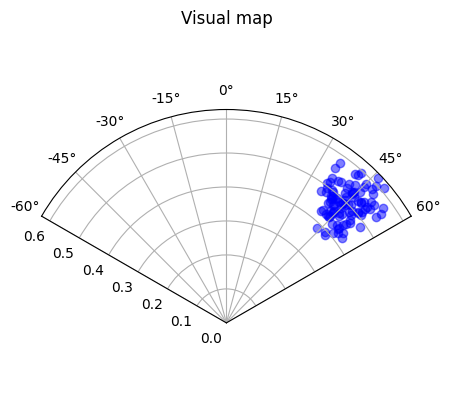

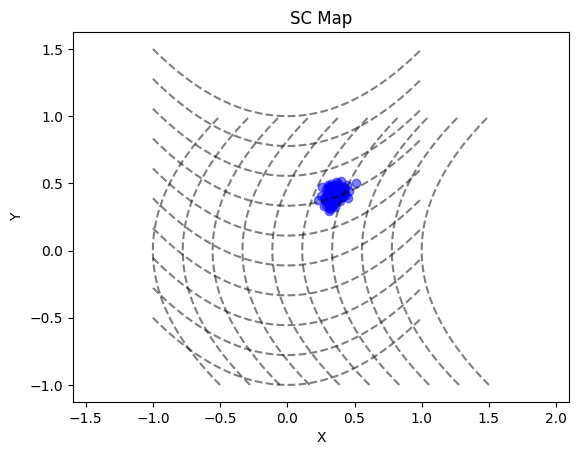

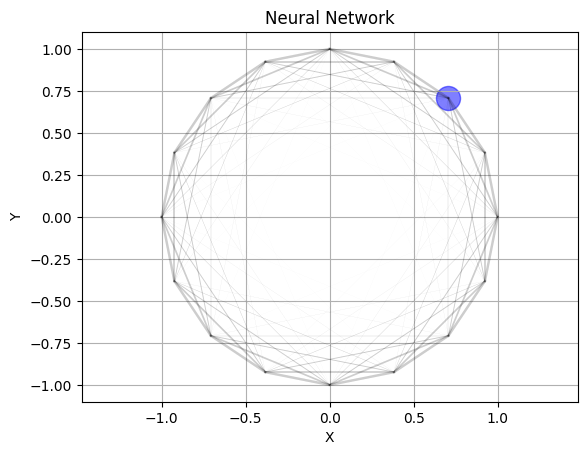

In [17]:
# CAN model with visual map and superior colliculus map
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, num_neurons=16):
        self.num_neurons = num_neurons
        self.preferred_directions = np.linspace(0, 2*np.pi, num_neurons, endpoint=False)
        self.activities = np.zeros(num_neurons)
        self.weight_matrix = self.create_weight_matrix()

    def create_weight_matrix(self):
        weight_matrix = np.zeros((self.num_neurons, self.num_neurons))
        for i in range(self.num_neurons):
            for j in range(self.num_neurons):
                angle_diff = np.abs(self.preferred_directions[i] - self.preferred_directions[j])
                angle_diff = min(angle_diff, 2*np.pi - angle_diff)
                weight_matrix[i, j] = np.exp(-angle_diff**2 / (2 * (np.pi/4)**2))
        return weight_matrix

    def update_activities(self, external_input):
        self.activities = np.dot(self.weight_matrix, self.activities) + external_input
        self.activities = np.maximum(self.activities, 0)  # Rectified linear activation

    def stimulate_specific_area(self, x, y):
        # Calculate the angle corresponding to the point (x, y)
        target_angle = np.arctan2(y, x)

        # Find the neuron with the closest preferred direction to the target angle
        closest_neuron_idx = np.argmin(np.abs(self.preferred_directions - target_angle))

        # Create an external input to stimulate the closest neuron
        external_input = np.zeros(self.num_neurons)
        external_input[closest_neuron_idx] = 3

        return external_input

    def visualize_network(self):
        plt.figure()

        # Create a circular representation of the neurons
        angles = np.linspace(0, 2*np.pi, self.num_neurons, endpoint=False)
        x = np.cos(angles)
        y = np.sin(angles)

        # Plot the neurons
        for i in range(self.num_neurons):
            plt.scatter(x[i], y[i], s=self.activities[i]*100, c='b', alpha=0.5)

        # Plot the connections (weights) between neurons
        for i in range(self.num_neurons):
            for j in range(self.num_neurons):
                if self.weight_matrix[i, j] > 0:
                    plt.plot([x[i], x[j]], [y[i], y[j]], 'k-', linewidth=self.weight_matrix[i, j]*2, alpha=0.1)

        plt.title('Neural Network')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid(True)
        plt.axis('equal')
        plt.show()



    def visualize(self, trials_results):
        plt.figure()
        ax = plt.subplot(111, projection='polar')
        ax.set_theta_offset(np.pi / 2)
        ax.set_theta_direction(-1)
        ax.set_thetamin(-60)
        ax.set_thetamax(60)

        for trial in trials_results:
            for i in range(self.num_neurons):
                if trial[i] > 0:
                    offset_angle = np.random.normal(0, np.pi/36)  # Adding a random offset to the angle
                    offset_radius = np.random.normal(0, 0.05)  # Adding a random offset to the radius
                    ax.scatter(self.preferred_directions[i] + offset_angle, 0.5 + offset_radius, c='b', alpha=0.5)

        plt.title('Visual map')
        plt.grid(True)
        plt.show()

    def visual_to_sc_map(self, x, y):
        # Apply a transformation to generate a curved SC map
        sc_x = x
        sc_y = y + 0.5*x**2
        return sc_x, sc_y

    def visualize_sc_map(self, trials_results):
        plt.figure()

        # Create a custom grid with curved lines
        x = np.linspace(-1, 1, 100)
        for i in np.linspace(-1, 1, 10):
            plt.plot(x, i + 0.5*x**2, 'k--', alpha=0.5)
            plt.plot(i + 0.5*x**2, x, 'k--', alpha=0.5)

        for trial in trials_results:
            for i in range(self.num_neurons):
                if trial[i] > 0:
                    offset_angle = np.random.normal(0, np.pi/36)  # Adding a random offset to the angle
                    offset_radius = np.random.normal(0, 0.05)  # Adding a random offset to the radius

                    # Convert polar coordinates to cartesian coordinates
                    x = (0.5 + offset_radius) * np.cos(self.preferred_directions[i] + offset_angle)
                    y = (0.5 + offset_radius) * np.sin(self.preferred_directions[i] + offset_angle)

                    # Apply the visual to SC map transformation
                    sc_x, sc_y = self.visual_to_sc_map(x, y)

                    plt.scatter(sc_x, sc_y, c='b', alpha=0.5)

        plt.title('SC Map')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid(False)
        plt.axis('equal')
        plt.show()


# Initialize neural network
neural_network = NeuralNetwork()

# Run multiple trials and store the results
num_trials = 100
trials_results = []

for _ in range(num_trials):
    # Reset activities before each trial
    neural_network.activities = np.zeros(neural_network.num_neurons)

    # External input to stimulate the neuron closest to the point
    external_input = neural_network.stimulate_specific_area(0.3, 0.3)

    # Update activities and store the results
    neural_network.update_activities(external_input)
    trials_results.append(neural_network.activities.copy())

# Visualize the results of all trials
neural_network.visualize(trials_results)
# Visualize the results of all trials in SC space
neural_network.visualize_sc_map(trials_results)
# Visualize the network at this trial
neural_network.visualize_network()